<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Python_Learning_Day_4_7_Sankey_Flow%2C_Heatmap_%26_RL_attention_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import plotly.graph_objects as go

# Percobaan untuk membuat posisi encoding
def get_positional_encoding(max_seq_len, d_model):
    pos = np.arange(max_seq_len)[:, np.newaxis]
    dim = np.arange(d_model)[np.newaxis, :]
    angle = pos / np.power(10000, (2 * (dim // 2)) / d_model)
    angle[:, 0::2] = np.sin(angle[:, 0::2])
    angle[:, 1::2] = np.cos(angle[:, 1::2])
    return angle

# Implementasi Self-Attention dan cara kerjanya
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, d_model):
        super(SelfAttention, self).__init__()
        self.d_model = d_model
        self.query = tf.keras.layers.Dense(d_model)
        self.key = tf.keras.layers.Dense(d_model)
        self.value = tf.keras.layers.Dense(d_model)

    def call(self, x):
        Q = self.query(x)
        K = self.key(x)
        V = self.value(x)
        attention_scores = tf.matmul(Q, K, transpose_b=True) / tf.sqrt(tf.cast(self.d_model, tf.float32))
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)
        return tf.matmul(attention_weights, V), attention_weights

# Contoh penggunaan dan aplikasinya
max_seq_len = 5
d_model = 64
positional_encoding = get_positional_encoding(max_seq_len, d_model)
x = tf.constant(positional_encoding, dtype=tf.float32)

# Membuat layer self-attention
attention_layer = SelfAttention(d_model)
output, attention_weights = attention_layer(x)

# Visualisasi dengan model Sankey Diagram
fig = go.Figure()
source = []
target = []
value = []

for i in range(max_seq_len):
    for j in range(max_seq_len):
        source.append(i)
        target.append(j)
        value.append(attention_weights[i, j].numpy())

fig.add_trace(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[f"Token {i}" for i in range(max_seq_len)]
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

fig.update_layout(title_text="Sankey Diagram of Attention Weights", font_size=12)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

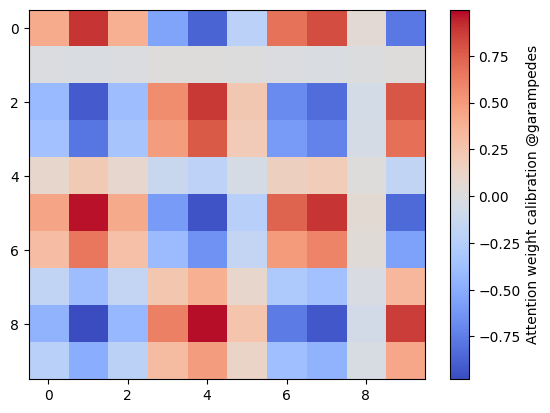

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from google.colab import files

# percobaan inisialisasi data
fig, ax = plt.subplots()
x = np.linspace(0, 10, 10)  # 10 kolom
y = np.linspace(0, 10, 10)  # 10 baris
X, Y = np.meshgrid(x, y)

# percobaan 2 fungsi untuk pola data yang akan ditampilkan
def generate_data(frame):
    return np.sin(X + frame * 0.1) * np.cos(Y + frame * 0.1)

# Generate data untuk heatmap
data = generate_data(0)
cax = ax.imshow(data, cmap='coolwarm', aspect='auto', animated=True)
cbar = fig.colorbar(cax, ax=ax)  # Menambahkan colorbar
cbar.set_label('Attention weight calibration')

# Fungsi data untuk array
def update(frame):
    new_data = generate_data(frame)
    cax.set_array(new_data)
    return cax,

# pengecekan animasi secara gradual
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=True)

# percobaan untuk save animasi dengan format gif
ani.save('heatmap_animation.gif', writer='pillow', fps=20)

# save file gif
files.download('heatmap_animation.gif')

/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


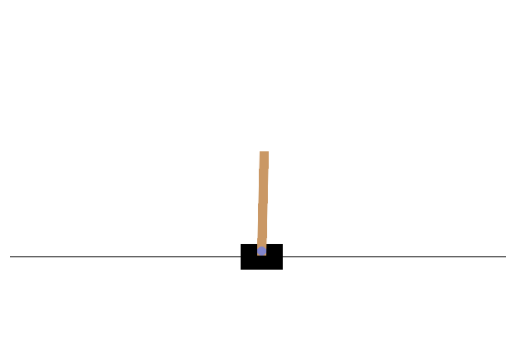

In [ ]:
%matplotlib inline
import gym
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML

# instalasi & update Gym
!pip install gym
!pip install --upgrade gym

# Inisialisasi cartpole sebagai environment
env = gym.make('CartPole-v1', render_mode='rgb_array')
frames = []

# simulasi interaksi agent dengan environment
state = env.reset()
terminated = truncated = False
while not (terminated or truncated):
    action = env.action_space.sample()  # Aksi acak
    state, _, terminated, truncated, _ = env.step(action)  # Unpack 5 nilai
    frames.append(env.render())  # Simpan frame

env.close()

# membuat animasi GIF
fig, ax = plt.subplots()
ax.set_axis_off()

def animate(i):
    img = plt.imshow(frames[i])
    return [img]

ani = FuncAnimation(fig, animate, frames=len(frames), interval=50)
HTML(ani.to_jshtml())  # Tampilkan animasi langsung di notebook

In [ ]:
!pip install matplotlib plotly ipywidgets kaleido
!pip install --upgrade plotly

import plotly.graph_objects as go
from IPython.display import Image, display
import imageio
import os

# Fungsi untuk membuat diagram Sankey dengan animasi
def create_animated_sankey(n_steps=5):
    # Warna untuk tiap attention
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']

    # Membuat frame untuk animasi
    frames = []
    filenames = []

    for i in range(1, n_steps+1):
        # Generate label untuk tiap tahap
        labels = [f'Attention {j+1}' for j in range(i)]

        # Membuat link antar node
        links = {
            'source': list(range(i-1)),
            'target': list(range(1,i)),
            'value': [1]*(i-1),
            'color': [colors[j] for j in range(i-1)]
        }

        # Membuat figure
        fig = go.Figure(go.Sankey(
            node=dict(
              pad=15,
              thickness=20,
              line=dict(color="black", width=0.5),
              label=labels,
              color=colors
            ),
            link=links
        ))

        # Update layout
        fig.update_layout(
            title_text=f"Step {i}: Attention Flow",
            font_size=12,
            height=600,
            width=800
        )

        # Simpan frame sebagai gambar
        filename = f'frame_{i}.png'
        fig.write_image(filename, engine="kaleido")
        filenames.append(filename)

    # Membuat GIF dari semua frame
    images = []
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('attention_flow.gif', images, duration=1)

    # Hapus file temporary
    for filename in filenames:
        os.remove(filename)

    return 'attention_flow.gif'

# Membuat animasi dengan 5 tahap
gif_path = create_animated_sankey(n_steps=5)

# Menampilkan GIF di notebook
display(Image(url=gif_path))

<ipython-input-6-8e008b7d87c5>:58: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



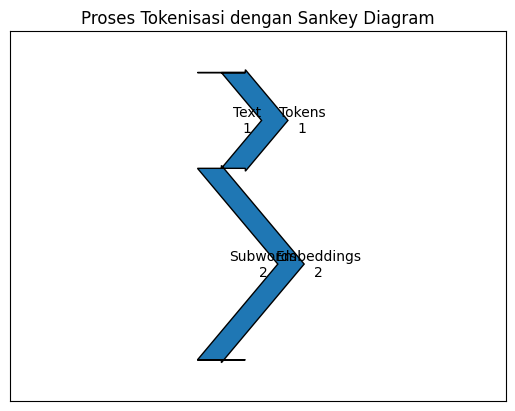

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

# Data tokenisasi (contoh)
flows = [1, -1, 2, -2]  # Aliran: Text → Tokens → Subwords → Embeddings
labels = ['Text', 'Tokens', 'Subwords', 'Embeddings']
orientations = [0, 0, 0, 0]  # Orientasi horizontal

# Membuat Sankey Diagram
Sankey(flows=flows, labels=labels, orientations=orientations).finish()

# Menambahkan judul dan menampilkan diagram
plt.title("Proses Tokenisasi dengan Sankey Diagram")
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly

# Instalasi Plotly (jika belum terpasang)
!pip install plotly

# Data Attention (contoh: 4 layer attention dengan nilai acak)
nodes = ["Attention 1", "Attention 2", "Attention 3", "Attention 4"]
frames = []

# Membuat frame animasi
for frame_num in range(5):  # 5 frame animasi
    links = {
        'source': [0, 1, 2, 3],  # Sumber: setiap layer attention
        'target': [1, 2, 3, 0],  # Tujuan: layer berikutnya
        'value': [frame_num + 1, frame_num + 2, frame_num + 3, frame_num + 4]  # Nilai attention
    }
    frames.append(go.Frame(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=nodes,
            color="blue"
        ),
        link=links
    )]))

# Membuat diagram Sankey dasar
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
        color="blue"
    ),
    link=dict(
        source=[0, 1, 2, 3],
        target=[1, 2, 3, 0],
        value=[1, 2, 3, 4]
    )
)])

# Menambahkan frame animasi
fig.frames = frames

# Mengatur layout animasi
fig.update_layout(
    title_text="Animated Sankey Diagram of Attention Weights",
    hovermode='x',
    updatemenus=[dict(
        type="buttons",
        buttons=[dict(
            label="Play",
            method="animate",
            args=[None, {"frame": "animate", "mode": "immediate", "fromcurrent": True}]
        )]
    )]
)

# Menyimpan animasi sebagai GIF
fig.write_gif('attention_sankey.gif')

# Menampilkan animasi di notebook
from IPython.display import Image
Image(filename='attention_sankey.gif')

AttributeError: 'Figure' object has no attribute 'write_gif'